In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [2]:
dat_file = np.load('Introduction-to-Python-for-Data-Sciences-master/data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.zeros(28)

In [4]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)
grad_i = lambda x, i : A[i] * ( A[i].T @ x - b[i])
grad_2 = lambda x: A.T @ A
grad_2_i = lambda x, i: A[i].T @ A[i]

In [9]:
L = max(np.linalg.eigh(A.T @ A)[0])

In [172]:
def L_FBGS(x0, func, grad, grad_i, grad_2_i, steps, num_func, b, bh, l, nu):
    xk = x0.copy()
    res = [func(xk)]
    r = 0
    n = num_func + 1
    hr = np.eye(len(xk))
    grad_first = grad(x0)
    sum_xk = xk
    prev_ur = np.zeros(len(xk))
    omeg = x0.copy()
    for k in range(len(xk)):
        gr = grad(xk)
        xk = omeg
        for t in range(steps):
            s_b = np.random.randint(0, num_func, b)
            grads = [grad_i(xk, i) - grad_i(omeg, i) + gr for i in s_b]
            vt = sum(grads) / b
            xk -= nu * hr @ vt
            
            if k % l == 0 & k > 0:
                r += 1
                ur = sum_xk / l
                tet_r = np.random.randint(0, num_func, bh)
                grad_2tmp = [grad_2_i(xk, i) for i in tet_r]
                grad_2t = sum(grad_2tmp) / bh
                sr = ur - prev_ur
                yr = grad_2t * sr
                
                poj = 1 / (sr.T @ yr)
                I = np.eye(len(xk))
                tmp_matr = (I - poj * np.outer(sr, yr))
                hr = tmp_matr.T @ hr @ tmp_matr + poj * np.outer(sr, sr) 
                
                prev_ur = ur
                sum_xk = 0
            sum_xk += xk 
            res.append(func(xk))  
        omeg[k] = xk[np.random.randint(0, len(xk), 1)]    
    return xk, res

In [181]:
xk, res = L_FBGS(x0, func, grad, grad_i, grad_2_i, 100, len(b), 50, 600, 20, 0.00001)

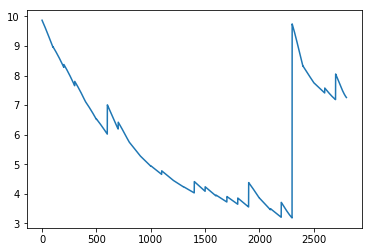

In [182]:
plt.plot(np.log(np.array(res) - 373.4040155581676))
plt.show()